<a href="https://colab.research.google.com/github/schenita/info5731/blob/master/Floyd_Assign5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: IMDB review sample Classification with fast.ai Deep Learning Framework

**Question 1: (10 points)**

Export the sample data set you created in [Classwork 3](https://colab.research.google.com/drive/1be7ksupqRkdjU1fZUAS37F5GiLCkFzkR) with pickle library, name it `imdb-sample.pickle`, and upload it to Google Colab. Then run the following codes.

In [78]:
from fastai.text import *
path = Path('.')
with open("imdb-sample.pickle", 'rb') as f:
    train, valid = pickle.load(f)
valid.tail()

,text,sentiment
995,"This is my opinion of this movie, expressed in...",0
996,Why can't a movie be rated a zero? Or even a n...,0
997,The Gun is probably the worst film I've ever s...,0
998,If you are thinking of going to see this film ...,0
999,This movie was like a gathering of people that...,0


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-11-10-085256.png)

**Question 2: (10 points)**

Create a TextLMDataBunch instance called `data_lm`, load your train and valid Dataframe into it, and run the following code.

In [0]:
# Your code here:
data_lm = TextLMDataBunch.from_df(path=path, train_df=train , valid_df=valid, text_cols=0, label_cols=1 ) 

In [80]:
data_lm.show_batch()

idx,text
0,"very moment . xxmaj mary xxmaj xxunk , who i seem to remember from xxup snl or some other xxup tv comedy skit show , is the evil wife , and xxmaj larry xxmaj drake plays the lunatic in the xxunk xxmaj santa outfit . i had forgotten xxmaj santa was played by xxmaj drake over the years . xxmaj his xxmaj santa is an unstoppable force and quite"
1,"these days . \n \n i understand it 's a movie and that 's why i accept it as a funny situation . xxmaj plus , the humor is versatile . xxmaj there are moments involving xxup xxunk , funny lines with xxmaj chabat 's best friend , some lesbian references , funny situations involving the family women , and more . \n \n xxmaj charlotte xxmaj xxunk"
2,"xxmaj chocolat before my viewing of it . i did n't know anything about the story , the cast , the director , or anything about the film 's history . xxmaj all i knew was it was a highly - acclaimed xxmaj french film . xxmaj had i known more , i probably would n't have viewed the picture with an open mind . xxmaj on paper ,"
3,"xxunk xxmaj digital xxunk xxmaj surround xxmaj sound . xxup dvd also an jam session with xxmaj sandler & xxmaj cheadle , an featurette , photo montage and previews . i was expecting more for the xxup dvd features like an audio commentary track by the director and deleted scenes . "" xxmaj reign xxmaj over xxmaj me "" is certainly one of the best films that came out"
4,"his stuntmen were injured during this movie that nobody would insure them anymore - xxmaj jackie had to take responsibility himself . xxmaj there are no gimmicks , wires or stand - ins - it is all true - life action that is a treat to watch . xxmaj it is this type of action that made him the phenomenon that he is and it is a movie that"


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-14-25-459713.png)

**Question 3: (10 points)**

Create a `language_model_learner` named `learn`, use `data_lm` as input data, `AWD_LSTM` as architecture, and choose 0.5 as Dropout rate. Draw the result of learning rate finder.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


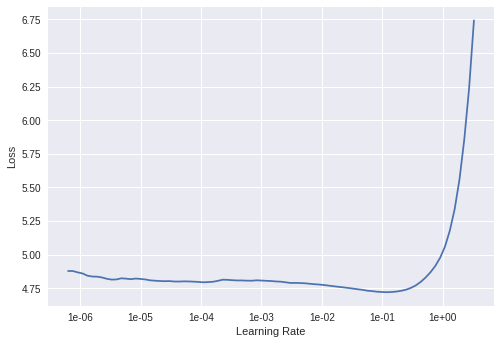

In [83]:
# Your code here:

learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.lr_find()
learn.recorder.plot(skip_end=5)

You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-17-47-701082.png)

**Question 4: (20 points)**

Fit one cycle with your language learner (`learn`), unfreeze it and fit another 3 cycles. Save the language learner's encoder as `ft_enc`.

In [84]:
# Your code here:

learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.save('fit_head')
learn.load('fit_head');
learn.unfreeze()
learn.fit_one_cycle(3, 1e-3, moms=(0.8,0.7))
learn.save('fine_tuned')
learn.load('fine_tuned')
learn.save_encoder('ft_enc')

epoch,train_loss,valid_loss,accuracy,time
0,4.449728,3.990738,0.285495,01:00


epoch,train_loss,valid_loss,accuracy,time
0,4.120098,3.924325,0.291396,01:13
1,3.984432,3.878586,0.296164,01:13
2,3.830502,3.868369,0.296899,01:13


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-20-09-953060.png)

**Question 5: (10 points)**

Create a TextClasDataBunch instance called `data_clas`, load your train and valid Dataframe into it, use the vocab from `data_lm.train_ds.vocab`, set batch size as 32, and run the following code.

In [0]:
# Your code here:
data_clas = TextClasDataBunch.from_df(path, train_df=train, valid_df=valid, text_cols=0, label_cols=1)


In [87]:
data_clas.show_batch()

text,target
"xxbos xxmaj the freedom of having your own xxmaj sea xxmaj going xxmaj power xxmaj boat , the excitement of going on underwater adventures a rugged , an 's man of an adventurer and xxunk so well endowed ! ) xxunk in fine xxmaj bikinis were all definite selling points for "" xxup sea xxup xxunk - 61 ) . \n \n xxmaj just what was the reason for",1
"xxbos i have never seen any of xxmaj spike xxmaj lee 's prior films , as their trailers never caught my interest . i have seen , and admire xxmaj denzel xxmaj washington , and xxmaj jodie xxmaj foster 's work , and have several of their dvds . i was , however , entirely disappointed with this movie . xxmaj if this film is any indication of xxmaj spike",0
"xxbos xxmaj to be a xxmaj buster xxmaj keaton fan is to have your heart broken on a regular basis . xxmaj most of us first encounter xxmaj keaton in one of the brilliant feature films from his great period of independent production : ' xxmaj the xxmaj general ' , ' xxmaj the xxmaj xxunk ' , ' xxmaj sherlock xxmaj jnr ' . xxmaj we recognise him as",0
"xxbos xxup oliver xxup twist was to have controversy as well as success following it after xxmaj dickens published it in xxunk . xxmaj his picture of life in the urban ghettos was something shocking and new , and his making the central figures of the novel include criminals was another innovation . \n \n xxmaj one day he was walking in xxmaj london and passed a young woman",1
"xxbos xxmaj the movie "" macarthur "" begins and ends at xxmaj gen. xxmaj douglas macarthur 's , xxmaj gregory xxmaj peck , xxmaj xxunk xxmaj mata the xxup us xxmaj military xxmaj academy of xxmaj west xxmaj point on the xxmaj hudson . xxmaj we see a frail 82 year old xxmaj xxunk . macarthur give the commencement speech to the xxunk class of 1962 about what an honor",1


You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-24-53-893234.png)

**Question 6: (10 points)**

Create a `text_classifier_learner` named `learn`, use `data_clas` as input data, `AWD_LSTM` as architecture, and choose 0.5 as Dropout rate. Note to compare the result with Scikit-learn and textblob later, you need to make sure Precision and Recall are in the metrics list. Load the encoder  (`ft_enc`) you saved just now into `learn`. Draw the result of learning rate finder.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


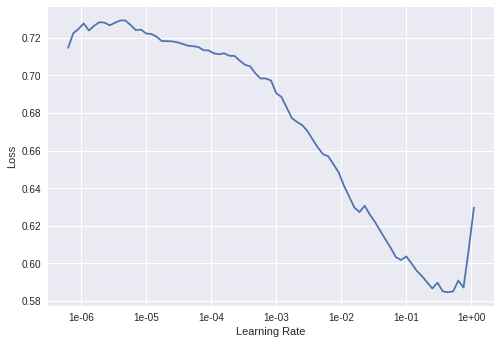

In [92]:
# Your code here:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')
learn.lr_find()
learn.recorder.plot(skip_end=5)

You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-27-55-239469.png)

**Question 7: (20 points)**

Fit one cycle with your text classifier learner (`learn`). Unfreeze the last two layers, and fit 3 cycles. Then unfreeze it totally, and fit another 2 cycles. Show the training result.

In [0]:
# Your code here:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.save('fit_head')
learn.load('fit_head');
learn.unfreeze()
learn.fit_one_cycle(3, 1e-3, moms=(0.8,0.7))
learn.save('fine_tuned')
learn.load('fine_tuned')
learn.save_encoder('result')
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3, moms=(0.8,0.7))
learn.save('fine_tuned')
learn.load('fine_tuned')
learn.save_encoder('result')
# I ran out of GPUs so I could not run this one without it being interrupted several times

You should see the output like this:

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-03-26-10-31-32-631875.png)

**Question 8: (10 points)**

Comparing the result with those from textblob, scikit-learn in Classwork 3, what is your finding? How about comparing with the result from Self-study 7 (the whole IMDB dataset)? Write down your answer and comments.

*Your answer here:*



In [0]:
# Results from CW #3
# TextBlob
 precision    recall  f1-score   support

           0       0.91      0.43      0.59       500
           1       0.63      0.96      0.76       500

   micro avg       0.69      0.69      0.69      1000
   macro avg       0.77      0.69      0.67      1000
weighted avg       0.77      0.69      0.67      1000
# SK Learn
 precision    recall  f1-score   support

           0       0.79      0.85      0.82       500
           1       0.84      0.78      0.81       500

   micro avg       0.81      0.81      0.81      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000

# ANSWER: The TextBlob had the lowest rates and FastAI had the highest rates. FastAI is the better model.
# FastAI even had better recall rates.
